## **Introduction**

In tech, Apple vs Samsung is one of the biggest battle. We are aiming to do a competitive analysis between iphone and samsung smartphones through sentiment analysis from tweets. The battle between Apple's OS and Android always prevails. There is a section of people who wants to use nothing except apple unlike the section of people who do not want to be in Apple's ecosystem. We are scraping tweets from @SamsungNewsUS and @iPhone_News to compare the sentiments associated with them. It is an interesting topic to compare and understand the sentiments across these products. With the increasing popularity of these products expanding each day, this competitive analysis will help understand the market share of each product.

Apple takes first place for smartphones: 43 percent of US consumers reported purchasing Apple branded smartphones in the last year vs 29 percent purchasing Samsung (Source: TraQline, 4QE June 2021. However the global market tells a different story. On the international stage, Samsung ships more smartphones than any other manufacturer, while Apple held second place last quarter. (Source:https://www.traqline.com/newsroom/blog/competitive-analysis-apple-vs-samsung-market-share/)

So this sentiment analysis will help us to understand the emotion weightage across these two brands and will help in assessing the market performance of both the brands. Understanding the performance of these two highly competitive brands will help in many ways. One of the major contribution would be to make decisions on portfolio investment. 

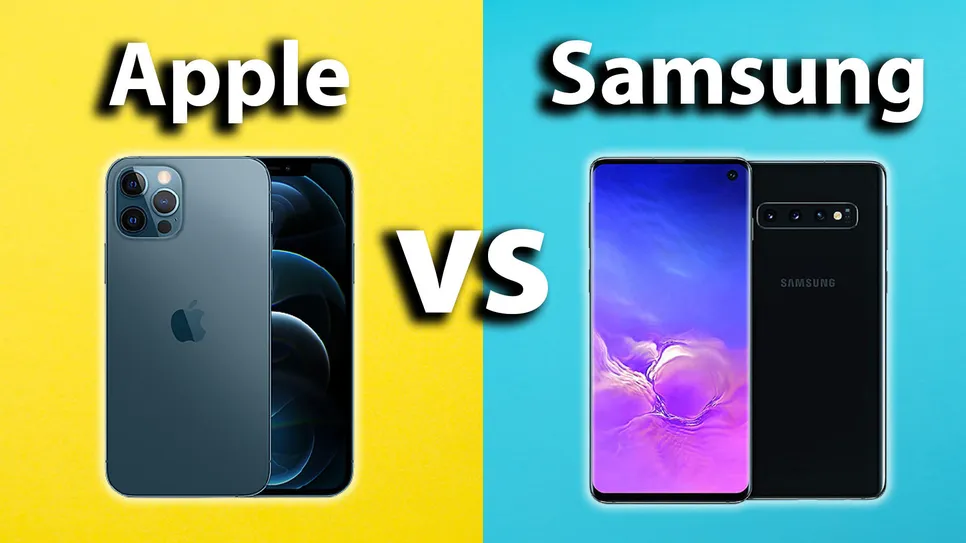

# **Import Modules**

# **Part 1 : Data Preparation**

In [ ]:
# import modules
import numpy as np
import pandas as pd

import os
import pandas as pd

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# nltk modules
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import keras
keras.__version__

'2.9.0'

In [ ]:
#import modules
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, GRU, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#import modules
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, GRU
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [ ]:
#import modules
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## **Scraping Tweets**

In [ ]:
# folder to store data
base_dir = '/content/'

#create new directory in local drive
tf.io.gfile.mkdir(base_dir)

#append 2 strings
iphone_dir = base_dir + '/iPhone/'

#Create the second directory
tf.io.gfile.mkdir(iphone_dir)

In [ ]:
# folder to store data
base_dir = '/content/'

#create new directory in local drive
tf.io.gfile.mkdir(base_dir)

#append 2 strings
samsung_dir = base_dir + '/Samsung/'

#Create the second directory
tf.io.gfile.mkdir(samsung_dir)

In [ ]:
#use this to scrape tweets
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 2.2 MB/s 


In [ ]:
maxTweets = 2000 # we are updating 2000 tweets of iphone

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@iPhone_News + since:2000-12-02 until:2022-06-01-filter:links -filter:replies').get_items()):
  csvFile = open(iphone_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

In [ ]:
maxTweets = 2000 # we are updating 2000 tweets of samsung

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@SamsungNewsUS + since:2000-12-02 until:2022-06-01-filter:links -filter:replies').get_items()):
  csvFile = open(samsung_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
csvFile.close()

In [ ]:
#read the path
file_path1 = "/content/iPhone/"

#list the files from directory
file_list1 = os.listdir(file_path1)

In [ ]:
#read the path
file_path2 = "/content/Samsung/"

#list the files from directory
file_list2 = os.listdir(file_path2)

## **Combining multiple files**

In [ ]:
df = pd.DataFrame()
#append all files together from the directory
for file in file_list1:
  df_temp = pd.read_csv(file_path1 + file)
  df = df.append(df_temp, ignore_index=True)

df # print the dataframe of iphone

,id,date,tweet
0,1527666972225245189,2022-05-20 15:06:03+00:00,iPhone Users Report iMessage Deactivation Issu...
1,1466160062200619010,2021-12-01 21:39:33+00:00,How to See 'Spotify Wrapped' for Apple Music h...
2,1531735527568703488,2022-05-31 20:33:02+00:00,Apple's WWDC 2022 Event Page Features Animated...
3,1498390327371046913,2022-02-28 20:11:07+00:00,Hands-on: The Zike MagSafe Charger Stand featu...
4,1509195383552937990,2022-03-30 15:46:33+00:00,Will iPhone ever use under-display Touch ID? K...
...,...,...,...
1996,1483852268864634882,2022-01-19 17:22:04+00:00,Deals: iPhone 12/mini sees $232 refurb discoun...
1997,1466218567645364231,2021-12-02 01:32:02+00:00,Deals: MagSafe Battery Pack on Sale for $74.99...
1998,1464322326900580355,2021-11-26 19:57:03+00:00,Best Black Friday iPhone Deals Available Today...
1999,1500865366519476226,2022-03-07 16:06:02+00:00,"40% of iPhone Users Plan to Buy iPhone SE 3, S..."


In [ ]:
df1 = pd.DataFrame()
#append all files together from the directory
for file in file_list2:
            df_temp = pd.read_csv(file_path2 + file)
            df1 = df1.append(df_temp, ignore_index=True)
df1 #print the dataframe of samsung

,id,date,tweet
0,1509616587095121928,2022-03-31 19:40:16+00:00,Batter Up! #Samsung and the #Mets Unveil Start...
1,1075203151056330757,2018-12-19 01:36:22+00:00,"""The Galaxy Note 9 is not perfect in every way..."
2,1530217267170000904,2022-05-27 16:00:01+00:00,Samsung is committed to responsible #recycling...
3,1325908271052455936,2020-11-09 21:09:00+00:00,Whether you're cooking a meal for your family🍽...
4,1394790832574648321,2021-05-18 23:03:43+00:00,Congratulations to #SamsungSolve National Winn...
...,...,...,...
1996,1224718769915822080,2020-02-04 15:38:03+00:00,Samsung announces the market launch of #Flashb...
1997,1075444328997228550,2018-12-19 17:34:43+00:00,The verdict is in from @Androidheadline on 201...
1998,1064967464159711233,2018-11-20 19:43:24+00:00,How about a chance to win an @ENERGYSTAR certi...
1999,1346841453306105856,2021-01-06 15:30:00+00:00,30 minutes to #TheFirstLook. Tune in: https://...


In [ ]:
df.shape # check the shape

(2001, 3)

In [ ]:
#concatenate both the dataframes of iphone and samsung into 1 dataframe
dff = pd.concat([df,df1], axis = 0)

In [ ]:
dff.head() # see the final dataframe

,id,date,tweet
0,1527666972225245189,2022-05-20 15:06:03+00:00,iPhone Users Report iMessage Deactivation Issu...
1,1466160062200619010,2021-12-01 21:39:33+00:00,How to See 'Spotify Wrapped' for Apple Music h...
2,1531735527568703488,2022-05-31 20:33:02+00:00,Apple's WWDC 2022 Event Page Features Animated...
3,1498390327371046913,2022-02-28 20:11:07+00:00,Hands-on: The Zike MagSafe Charger Stand featu...
4,1509195383552937990,2022-03-30 15:46:33+00:00,Will iPhone ever use under-display Touch ID? K...


In [ ]:
# reset the index 
dff.reset_index(inplace = True)

In [ ]:
dff.shape # the shape of the final dataframe

(4002, 4)

In [ ]:
dff.isnull().sum() # check the missing values

index    0
id       0
date     0
tweet    0
dtype: int64

There are no missing values in the dataframe

### **Lowercase**

We change all the words to lower cases so that no distinction is identified between two same words due to case sensitivity.

In [ ]:
# make everything lowercase
dff['tweet'] = dff['tweet'].str.lower()
dff.head()

,index,id,date,tweet
0,0,1527666972225245189,2022-05-20 15:06:03+00:00,iphone users report imessage deactivation issu...
1,1,1466160062200619010,2021-12-01 21:39:33+00:00,how to see 'spotify wrapped' for apple music h...
2,2,1531735527568703488,2022-05-31 20:33:02+00:00,apple's wwdc 2022 event page features animated...
3,3,1498390327371046913,2022-02-28 20:11:07+00:00,hands-on: the zike magsafe charger stand featu...
4,4,1509195383552937990,2022-03-30 15:46:33+00:00,will iphone ever use under-display touch id? k...


In [ ]:
dff.shape

(4002, 4)

### **Strip characters (!,~-@$% etc)**

We want to make our texts free of any characters, to increase the accuracy of our prediction.

In [ ]:
# remove any character with a blank
dff['tweet'] = dff['tweet'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()
dff.head()

<ipython-input-23-6dea24a51a9c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dff['tweet'] = dff['tweet'].str.replace('[^A-z ]','').str.replace(' +',' ').str.strip()


,index,id,date,tweet
0,0,1527666972225245189,2022-05-20 15:06:03+00:00,iphone users report imessage deactivation issu...
1,1,1466160062200619010,2021-12-01 21:39:33+00:00,how to see spotify wrapped for apple music htt...
2,2,1531735527568703488,2022-05-31 20:33:02+00:00,apples wwdc event page features animated ar tr...
3,3,1498390327371046913,2022-02-28 20:11:07+00:00,handson the zike magsafe charger stand feature...
4,4,1509195383552937990,2022-03-30 15:46:33+00:00,will iphone ever use underdisplay touch id kuo...


### **Stop Words**

The stop words are the most common words which do not create much impact in the sentiments. So we will like to remove the english stop words.

In [ ]:
nltk.download('stopwords') # download stop words
print(stopwords.words('english')) #print the stopwords

stop = stopwords.words('english') #get only english stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# the stop words are removed
dff["tweet"] = dff['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) 
dff.head()

,index,id,date,tweet
0,0,1527666972225245189,2022-05-20 15:06:03+00:00,iphone users report imessage deactivation issu...
1,1,1466160062200619010,2021-12-01 21:39:33+00:00,see spotify wrapped apple music httpstcoqkdvexin
2,2,1531735527568703488,2022-05-31 20:33:02+00:00,apples wwdc event page features animated ar tr...
3,3,1498390327371046913,2022-02-28 20:11:07+00:00,handson zike magsafe charger stand features ac...
4,4,1509195383552937990,2022-03-30 15:46:33+00:00,iphone ever use underdisplay touch id kuo isnt...


In [ ]:
#remove any spaces
dff = dff[dff.tweet != '']

In [ ]:
#check the shape
dff.shape

(4002, 4)

### **Text EDA**

We some exploratory data analysis on the texts to see which words are most common. We create some tables and visualizations in order to do so.

In [ ]:
#count the frequency of each word
myTable = dff['tweet'].str.split(expand=True).stack().value_counts()
myTable = pd.DataFrame(myTable)
# reset the index
myTable.reset_index(inplace=True)
# rename the columns
myTable.rename(columns={myTable.columns[0]:'word', myTable.columns[1]:'frequency'}, inplace=True)
myTable.head()

,word,frequency
0,iphone,1283
1,samsung,1143
2,apple,839
3,new,643
4,read,364


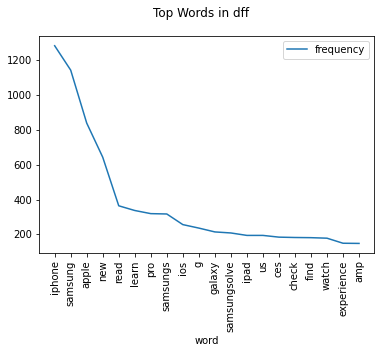

In [ ]:
myTable = myTable[0:20] #see the frequency of first 20 words in the list
myTable.plot(x='word', y='frequency')
plt.xticks(np.arange(len(myTable)), myTable['word'], rotation=90)
plt.suptitle('Top Words in dff')
plt.show()

### **Tokenizer**

We tokenize the tweets to small chunks. The tokens will help in understanding the context of the words better.

In [ ]:
#tokenize
dff['tweet'] = dff.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
dff.head()

,index,id,date,tweet
0,0,1527666972225245189,2022-05-20 15:06:03+00:00,"[iphone, users, report, imessage, deactivation..."
1,1,1466160062200619010,2021-12-01 21:39:33+00:00,"[see, spotify, wrapped, apple, music, httpstco..."
2,2,1531735527568703488,2022-05-31 20:33:02+00:00,"[apples, wwdc, event, page, features, animated..."
3,3,1498390327371046913,2022-02-28 20:11:07+00:00,"[handson, zike, magsafe, charger, stand, featu..."
4,4,1509195383552937990,2022-03-30 15:46:33+00:00,"[iphone, ever, use, underdisplay, touch, id, k..."


### **Word Cloud**

We generate a word cloud to visually represent the frequency of each word.

In [ ]:
# remove the brackets and commas in tweets and change the list to string
def rejoin_words(row):
    my_list = row['tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

dff['tweet'] = dff.apply(rejoin_words, axis=1)
dff['tweet'].head()

0    iphone users report imessage deactivation issu...
1     see spotify wrapped apple music httpstcoqkdvexin
2    apples wwdc event page features animated ar tr...
3    handson zike magsafe charger stand features ac...
4    iphone ever use underdisplay touch id kuo isnt...
Name: tweet, dtype: object

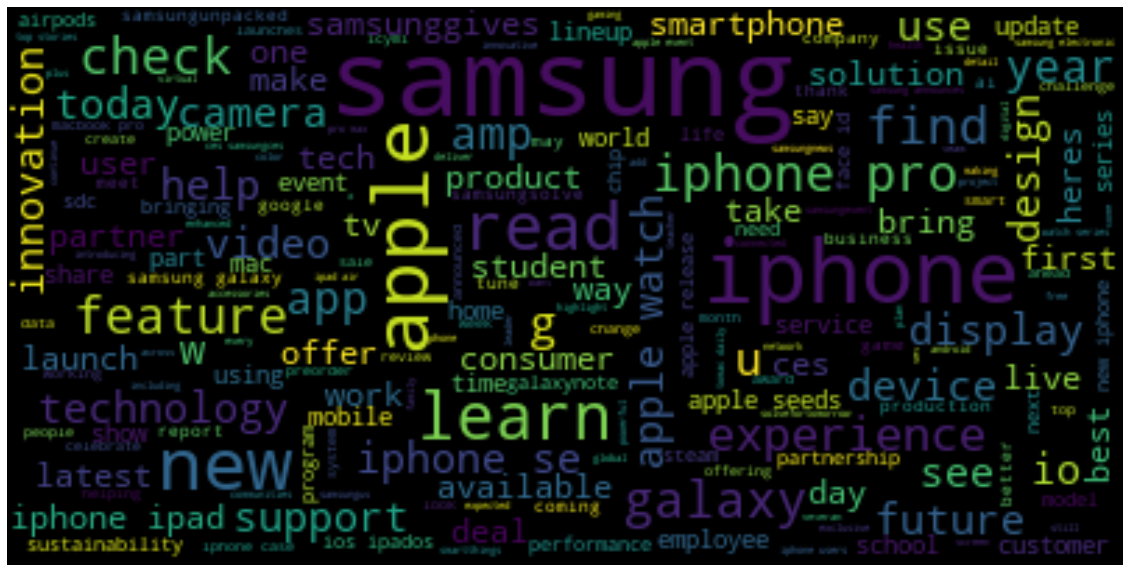

In [ ]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud().generate(' '.join(dff['tweet']))

wordcloud = WordCloud(max_font_size=40).generate(' '.join(dff['tweet']))
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Sentiment Intensity Analyzer**

We derive 4 scores for each Tweet: compound, pos, neutral and neg with the help of nltk Sentiment Intensity Analyzer.

In [ ]:
#define arrays to store the values of different emotions
tweet_list = list(dff['tweet'].values)
i_neg = []
i_neu = []
i_pos = []
i_com = []

In [ ]:
#append the different emotions in 4 different columns
for tweet in tweet_list:
  sid = SentimentIntensityAnalyzer()
  ss = sid.polarity_scores(tweet)
  i_neg.append(ss['neg'])
  i_neu.append(ss['neu'])
  i_pos.append(ss['pos'])
  i_com.append(ss['compound'])

In [ ]:
#create labels
df_i_label = pd.DataFrame(list(zip(i_neg,i_neu,i_pos,i_com)),columns=['neg','neu','pos','com'])

In [ ]:
#concatenate the labels
dff_f = pd.concat([dff,df_i_label],axis=1)

In [ ]:
#see the new dataframe
dff_f.head()

,index,id,date,tweet,neg,neu,pos,com
0,0,1527666972225245189,2022-05-20 15:06:03+00:00,iphone users report imessage deactivation issu...,0.000,1.000,0.000,0.0000
1,1,1466160062200619010,2021-12-01 21:39:33+00:00,see spotify wrapped apple music httpstcoqkdvexin,0.000,1.000,0.000,0.0000
2,2,1531735527568703488,2022-05-31 20:33:02+00:00,apples wwdc event page features animated ar tr...,0.000,1.000,0.000,0.0000
3,3,1498390327371046913,2022-02-28 20:11:07+00:00,handson zike magsafe charger stand features ac...,0.000,0.816,0.184,0.4019
4,4,1509195383552937990,2022-03-30 15:46:33+00:00,iphone ever use underdisplay touch id kuo isnt...,0.179,0.821,0.000,-0.2411


In [ ]:
#drop na
dff_f.dropna(inplace = True)

In [ ]:
#see the shape
dff_f.shape

(4002, 8)

It looks that there are no missing values as the shape remains same.

## **Distribution of Scores**

We see the distribution of scores of each emotions by plotting kernel density plots.

Text(0.5, 1.0, 'Compound')

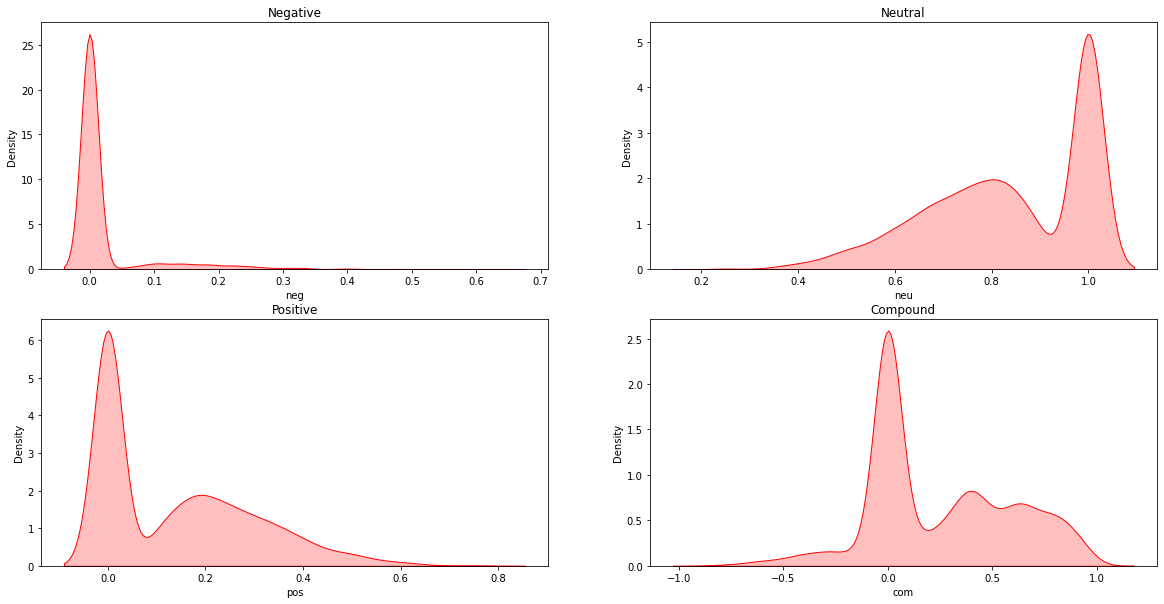

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,10))

# plotting both distibutions on the same figure
fig = sns.kdeplot(dff_f['neg'], shade=True, color="r",ax=ax1)
ax1.set_title("Negative")



# plotting both distibutions on the same figure

fig = sns.kdeplot(dff_f['neu'], shade=True, color="r",ax=ax2)
ax2.set_title("Neutral")



# plotting both distibutions on the same figure

fig = sns.kdeplot(dff_f['pos'], shade=True, color="r",ax=ax3)
ax3.set_title("Positive")





# plotting both distibutions on the same figure

fig = sns.kdeplot(dff_f['com'], shade=True, color="r",ax=ax4)
ax4.set_title("Compound")





We also look at the summary of the scores

In [ ]:
#summary
dff_f.iloc[:,-4:].describe()

,neg,neu,pos,com
count,4002.000000,4002.000000,4002.000000,4002.000000
mean,0.023335,0.837217,0.139449,0.244266
std,0.069893,0.164287,0.157193,0.345045
min,0.000000,0.235000,0.000000,-0.831600
25%,0.000000,0.720000,0.000000,0.000000
50%,0.000000,0.850000,0.109000,0.102700
75%,0.000000,1.000000,0.252000,0.526700
max,0.636000,1.000000,0.765000,0.979900


# **Part 2: Modeling**

In [ ]:
data = dff_f[['tweet','neg','neu','pos','com']] # Combining the data

In [ ]:
y = data[['neg','neu','pos','com']] # Extracting the target data

In [ ]:
# Applied lemmatization on the tweets to convert the word to its meaningful base form.
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['tweet_lemmatized']=data['tweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

<ipython-input-44-751c46380a63>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_lemmatized']=data['tweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))


## **Data preparation for model 1**

In [ ]:
# Obtaining the test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['tweet_lemmatized'], y,
                                                    random_state=42,
                                                    test_size=0.2)
print(data['tweet_lemmatized'].shape) 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4002,)
(3201,) (3201, 4)
(801,) (801, 4)


In [ ]:
#Obtaining the train and the validation split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    random_state=42,
                                                    test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2560,) (2560, 4)
(641,) (641, 4)


## **MODEL I: TF-IDF** 

In this model, we built the Dense model with using TF-IDF word encodings.



**TF-IDF:** Term Frequency - Inverse document frequency looks at how important a word is amongst the corpus.

It is computed using the below formula: 

TF = (Number of occurances of the word in the document) / (Total number of words in the document)

IDF = log(Total number of documents / Number of documents with the word in it)

TF-IDF = TF * IDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()  # TF-IDF vectorizer
tf_x_train = vectorizer.fit_transform(X_train) # fitting on train data
tf_x_validation = vectorizer.transform(X_val)  # fitting on the validation data
tf_x_test = vectorizer.transform(X_test) # fitting on the test data

In [ ]:
# Results of TfidfVectorizer are in Sparse matrix form.Converted to the dataframe.
tf_x_train=pd.DataFrame.sparse.from_spmatrix(tf_x_train)
tf_x_validation=pd.DataFrame.sparse.from_spmatrix(tf_x_validation)
tf_x_test=pd.DataFrame.sparse.from_spmatrix(tf_x_test)

In [ ]:
# # Model build with one input, one hidden and one output layer.
from keras.models import Sequential
from keras.layers import Dense, Dropout

model1 = Sequential()
model1.add(Dense(100, activation='relu', input_shape=(tf_x_train.shape[1],)))   #Input layer
model1.add(Dropout(0.5))  # Dropout layer
model1.add(Dense(100, activation='relu'))  # I dense hidden layer
model1.add(Dropout(0.5))  # Dropout layer
model1.add(Dense(4, activation='linear'))   # Final output layer with 4 outputs
model1.summary()  # printing the model summary



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               846700    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
Total params: 857,204
Trainable params: 857,204
Non-trainable params: 0
_________________________________________________________________


### **Model compiling and training**

In [ ]:
# Compiling the model
model1.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

# Earlystopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=5,
                   restore_best_weights = True) 

In [ ]:
# Fitting the model
history = model1.fit(tf_x_train, y_train,
                    validation_data = (tf_x_test, y_test),
                    callbacks=[es], 
                    epochs=50, 
                    batch_size=100, 
                    shuffle=True, 
                    verbose=1) 

Epoch 1/50
26/26 [==============================] - 2s 43ms/step - loss: 0.1013 - mae: 0.2233 - val_loss: 0.0399 - val_mae: 0.1451
Epoch 2/50
26/26 [==============================] - 1s 28ms/step - loss: 0.0494 - mae: 0.1674 - val_loss: 0.0324 - val_mae: 0.1289
Epoch 3/50
26/26 [==============================] - 1s 27ms/step - loss: 0.0377 - mae: 0.1446 - val_loss: 0.0257 - val_mae: 0.1120
Epoch 4/50
26/26 [==============================] - 1s 27ms/step - loss: 0.0288 - mae: 0.1249 - val_loss: 0.0229 - val_mae: 0.1057
Epoch 5/50
26/26 [==============================] - 1s 27ms/step - loss: 0.0228 - mae: 0.1100 - val_loss: 0.0202 - val_mae: 0.0953
Epoch 6/50
26/26 [==============================] - 1s 27ms/step - loss: 0.0197 - mae: 0.1014 - val_loss: 0.0191 - val_mae: 0.0915
Epoch 7/50
26/26 [==============================] - 1s 27ms/step - loss: 0.0180 - mae: 0.0960 - val_loss: 0.0186 - val_mae: 0.0908
Epoch 8/50
26/26 [==============================] - 1s 26ms/step - loss: 0.0162 - m

### **Computing predictions**

In [ ]:
# For test set
y_pred_test=model1.predict(tf_x_test)

# For train set
y_pred_train=model1.predict(tf_x_train)


80/80 [==============================] - 0s 6ms/step


### **Loss functions**

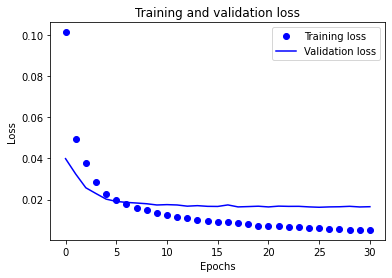

In [ ]:
import matplotlib.pyplot as plt

# extracting loss values for train and validation
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting loss values for all epochs
epochs = range(len(loss))


# plots
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

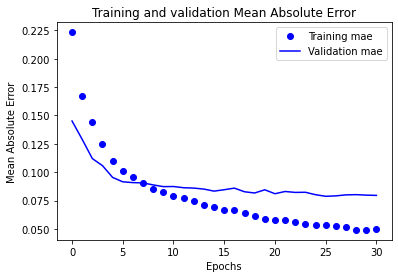

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['mae']
val_loss = history.history['val_mae']

epochs = range(len(loss))



plt.plot(epochs, loss, 'bo', label='Training mae')
plt.plot(epochs, val_loss, 'b', label='Validation mae')
plt.title('Training and validation Mean Absolute Error')

plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')

plt.legend()

plt.show()

### **Sentiment level metrics**

#### **Negative evaluation**

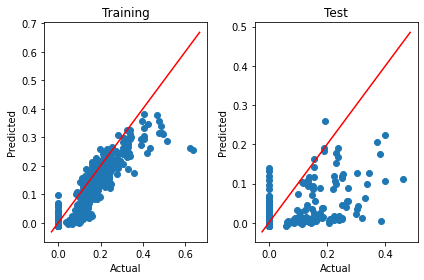

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 0
axes[0].scatter(x=y_train['neg'], y=y_pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['neg'], y=y_pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 0
print('-----------------------------------------------------------------------------------------')
print('Train: R2 for negative sentiment:',r2_score(y_train['neg'],y_pred_train[:,i])) 
print('Train: rmse for negative sentiment:',np.sqrt(mean_squared_error(y_train['neg'],y_pred_train[:,i]))) 
print('Train: MAE for negative sentiment:',mean_absolute_error(y_train['neg'], y_pred_train[:,i]))
print('-----------------------------------------------------------------------------------------')
print('Test: R2 for negative sentiment:',r2_score(y_test['neg'],y_pred_test[:,i])) 
print('Test: rmse for negative sentiment:',np.sqrt(mean_squared_error(y_test['neg'],y_pred_test[:,i]))) 
print('Test: MAE for negative sentiment:',mean_absolute_error(y_test['neg'], y_pred_test[:,i]))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Train: R2 for negative sentiment: 0.8664968599505757
Train: rmse for negative sentiment: 0.02582107863349131
Train: MAE for negative sentiment: 0.011546137289263425
-----------------------------------------------------------------------------------------
Test: R2 for negative sentiment: 0.32711582434935627
Test: rmse for negative sentiment: 0.058082442922490644
Test: MAE for negative sentiment: 0.024911048841024387
-----------------------------------------------------------------------------------------


#### **Neutral evaluation**

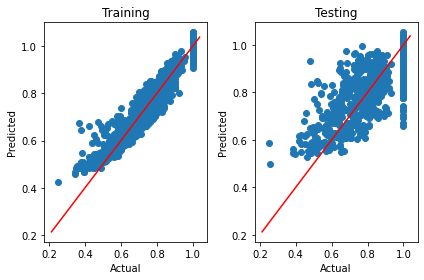

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 1
axes[0].scatter(x=y_train['neu'], y=y_pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['neu'], y=y_pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Testing")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
#Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 1
print('-----------------------------------------------------------------------------------------')
print('Train: R2 for Neutral sentiment:',r2_score(y_train['neu'],y_pred_train[:,i])) 
print('Train: rmse for Neutral sentiment:',np.sqrt(mean_squared_error(y_train['neu'],y_pred_train[:,i]))) 
print('Train: MAE for Neutral sentiment:',mean_absolute_error(y_train['neu'], y_pred_train[:,i]))
print('-----------------------------------------------------------------------------------------')
print('Test: R2 for Neutral sentiment:',r2_score(y_test['neu'],y_pred_test[:,i])) 
print('Test: rmse for Neutral sentiment:',np.sqrt(mean_squared_error(y_test['neu'],y_pred_test[:,i]))) 
print('Test: MAE for Neutral sentiment:',mean_absolute_error(y_test['neu'], y_pred_test[:,i]))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Train: R2 for Neutral sentiment: 0.948508373983905
Train: rmse for Neutral sentiment: 0.03732630670544105
Train: MAE for Neutral sentiment: 0.027885844314750285
-----------------------------------------------------------------------------------------
Test: R2 for Neutral sentiment: 0.6080388248194983
Test: rmse for Neutral sentiment: 0.1033878089320711
Test: MAE for Neutral sentiment: 0.08000190940569998
-----------------------------------------------------------------------------------------


#### **Positive evaluation**

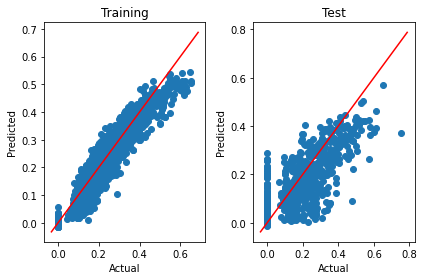

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 2
axes[0].scatter(x=y_train['pos'], y=y_pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['pos'], y=y_pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 2
print('-----------------------------------------------------------------------------------------')
print('Train: R2 for Positive sentiment:',r2_score(y_train['pos'],y_pred_train[:,i])) 
print('Train: rmse for Positive sentiment:',np.sqrt(mean_squared_error(y_train['neu'],y_pred_train[:,i]))) 
print('Train: MAE for Positive sentiment:',mean_absolute_error(y_train['pos'], y_pred_train[:,i]))
print('-----------------------------------------------------------------------------------------')
print('Test: R2 for Positive sentiment:',r2_score(y_test['pos'],y_pred_test[:,i])) 
print('Test: rmse for Positive sentiment:',np.sqrt(mean_squared_error(y_test['neu'],y_pred_test[:,i]))) 
print('Test: MAE for Positive sentiment:',mean_absolute_error(y_test['pos'], y_pred_test[:,i]))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Train: R2 for Positive sentiment: 0.9534221141464113
Train: rmse for Positive sentiment: 0.7661111021376983
Train: MAE for Positive sentiment: 0.02313734247473767
-----------------------------------------------------------------------------------------
Test: R2 for Positive sentiment: 0.6634743656774776
Test: rmse for Positive sentiment: 0.747790482604927
Test: MAE for Positive sentiment: 0.06617227424657002
-----------------------------------------------------------------------------------------


#### **Compound evaluation**

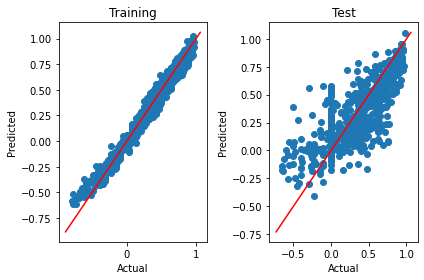

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 3
axes[0].scatter(x=y_train['com'], y=y_pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['com'], y=y_pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 3
print('-----------------------------------------------------------------------------------------')
print('Train: R2 for Compound sentiment:',r2_score(y_train['com'],y_pred_train[:,i])) 
print('Train: rmse for Compound sentiment:',np.sqrt(mean_squared_error(y_train['com'],y_pred_train[:,i]))) 
print('Train: MAE for Compound sentiment:',mean_absolute_error(y_train['com'], y_pred_train[:,i]))
print('-----------------------------------------------------------------------------------------')
print('Test: R2 for Compound sentiment:',r2_score(y_test['com'],y_pred_test[:,i])) 
print('Test: rmse for Compound sentiment:',np.sqrt(mean_squared_error(y_test['com'],y_pred_test[:,i]))) 
print('Test: MAE for Compound sentiment:',mean_absolute_error(y_test['com'], y_pred_test[:,i]))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Train: R2 for Compound sentiment: 0.9830539353205897
Train: rmse for Compound sentiment: 0.0448210840091775
Train: MAE for Compound sentiment: 0.0311662058045296
-----------------------------------------------------------------------------------------
Test: R2 for Compound sentiment: 0.6442472362739443
Test: rmse for Compound sentiment: 0.20626229285799166
Test: MAE for Compound sentiment: 0.1437779953624425
-----------------------------------------------------------------------------------------


## **Data preparation for model 2 and model 3**

In [ ]:
# Performed Tokenization by splitting entire texts into small units. Chosen 500 (large value) to cover all the words



tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data['tweet_lemmatized'].values) #Creates the vocabulary index based on word frequency.
X = tokenizer.texts_to_sequences(data['tweet_lemmatized'].values) # Transforms each text in texts to a sequence of integers
X = pad_sequences(X)




In [ ]:
#splitting into train, test 
X_train, X_v, y_train, y_v = train_test_split(X,y, test_size = 0.4, random_state = 42,shuffle=True)

In [ ]:
#splitting into validation and test
X_val,X_test,y_val,y_test = train_test_split(X_v,y_v,test_size=0.2,random_state=42,shuffle=True)

## **MODEL 2 [Flattened Word Embeddings]**

In this model, we used flattened word embeddings with 100 dimensions from Glove package.

Glove uses data from Wikipedia to produce vectors for common english words.

We used Dense model with a total of four layers i.e., one input, one output and two hidden layers with varying number of nodes for optimal perfromance.

Word embedings from Glove are added to the embedding layer which is set to be untrainable.

Pretrained word embeddings are particular useful in cases such as this one where data is small.

### **Word embeddings**

In [ ]:
import os # Download and unzip glove word embeddings from opensource, This may take more time based on download speeds
!pip install wget
import wget # Using wget library to download 
wget.download('https://nlp.stanford.edu/data/glove.6B.zip') # Download the zip file
os.mkdir('/content/glove_unzip')
from zipfile import ZipFile
ZipFile("/content/glove.6B.zip").extractall("/content/glove_unzip") # Ectract files
embeddings_index = {}
f = open('/content/glove_unzip/glove.6B.100d.txt') # File path 
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs # Add coefficients to the dictionary as word index pair
f.close()

print(f'Found {len(embeddings_index)} word vectors.')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=6822617e2dadd5fe470de78b086ba2801bd499ffe7242157056a21417d619622
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
Found 400000 word vectors.


In [ ]:
max_words = 10000 # max words capped at 10000 for the document (added maximum value it means it will cover entire length of tweet)
embedding_dim = 100 # this is the dimension of the file we imported
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

### **Model architecture**

In [ ]:
maxlen = X.shape[1]

In [ ]:
from keras.models import Sequential # Model Build with pre-trained embedding layer, drop out layer
from keras.layers import Embedding, Flatten, Dense

model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(512, activation='relu')) # Total four dense layers
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu')) # Input and hidden layers with 'relu' activation function
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(4, activation='linear')) # Output layer with four nodes
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 100)           1000000   
                                                                 
 flatten (Flatten)           (None, 2400)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1229312   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)              

### **Model compile and training**

In [ ]:
model2.layers[0].set_weights([embedding_matrix]) # Fixing embedding layer with pre-trained embeddings
model2.layers[0].trainable = False # Model is not trainable

In [ ]:
from keras.callbacks import EarlyStopping # Early stopping for the model.
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=5,
                   restore_best_weights = True)

In [ ]:
model2.compile(optimizer='adam', # Model compile with MAE as metric
              loss='mse',
              metrics=['mae'])
history = model2.fit(X_train, y_train, # Train the model with early stopping
                    epochs=500,
                    batch_size=100, 
                    callbacks = [es],
                    validation_data=(X_val, y_val)) # Validation data to adjust the weights and avoid over fitting.

model2.save_weights('pre_trained_glove_model.h5') # Save the weights

Epoch 1/500
25/25 [==============================] - 2s 47ms/step - loss: 0.0806 - mae: 0.2076 - val_loss: 0.0461 - val_mae: 0.1577
Epoch 2/500
25/25 [==============================] - 1s 43ms/step - loss: 0.0408 - mae: 0.1508 - val_loss: 0.0430 - val_mae: 0.1486
Epoch 3/500
25/25 [==============================] - 1s 52ms/step - loss: 0.0331 - mae: 0.1326 - val_loss: 0.0411 - val_mae: 0.1454
Epoch 4/500
25/25 [==============================] - 1s 56ms/step - loss: 0.0299 - mae: 0.1262 - val_loss: 0.0417 - val_mae: 0.1455
Epoch 5/500
25/25 [==============================] - 1s 50ms/step - loss: 0.0255 - mae: 0.1155 - val_loss: 0.0388 - val_mae: 0.1385
Epoch 6/500
25/25 [==============================] - 1s 57ms/step - loss: 0.0230 - mae: 0.1076 - val_loss: 0.0396 - val_mae: 0.1407
Epoch 7/500
25/25 [==============================] - 1s 59ms/step - loss: 0.0212 - mae: 0.1040 - val_loss: 0.0397 - val_mae: 0.1407
Epoch 8/500
25/25 [==============================] - 1s 46ms/step - loss: 0.

### **Loss Functions**

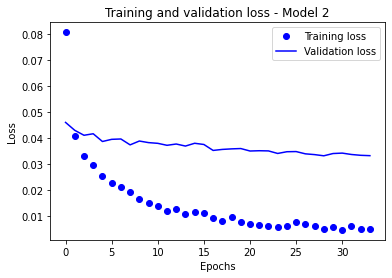

In [ ]:
import matplotlib.pyplot as plt # Loss curve

# extracting loss values for train and validation
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting loss values for all epochs
epochs = range(len(loss))


# plots
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 2')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

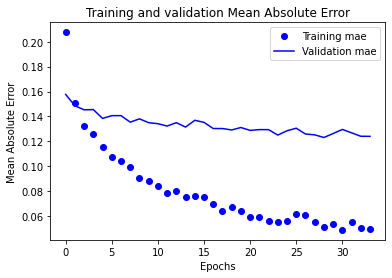

In [ ]:
import matplotlib.pyplot as plt #MSE vs Epochs


loss = history.history['mae']
val_loss = history.history['val_mae']

epochs = range(len(loss))



plt.plot(epochs, loss, 'bo', label='Training mae')
plt.plot(epochs, val_loss, 'b', label='Validation mae')
plt.title('Training and validation Mean Absolute Error')

plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')

plt.legend()

plt.show()

### **Computing predictions**

In [ ]:
y_pred_test=model2.predict(X_test) # Make predictions
y_pred_train=model2.predict(X_train)


76/76 [==============================] - 0s 6ms/step


### **Sentiment level metric Analysis**

#### **Negative Sentiment Evaluation**

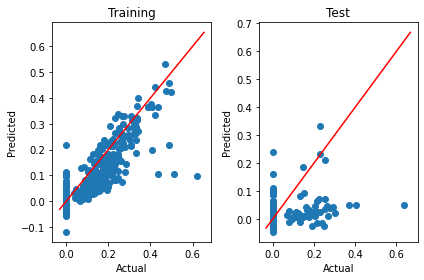

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 0
axes[0].scatter(x=y_train['neg'], y=y_pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['neg'], y=y_pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 0
print('-----------------------------------------------------------------------------------------')
print('Train: R2 for Negative sentiment:',r2_score(y_train['neg'],y_pred_train[:,i])) 
print('Train: rmse for Negative sentiment:',np.sqrt(mean_squared_error(y_train['neg'],y_pred_train[:,i]))) 
print('Train: MAE for Negative sentiment:',mean_absolute_error(y_train['neg'], y_pred_train[:,i]))
print('-----------------------------------------------------------------------------------------')
print('Test: R2 for Negative sentiment:',r2_score(y_test['neg'],y_pred_test[:,i])) 
print('Test: rmse for Negative sentiment:',np.sqrt(mean_squared_error(y_test['neg'],y_pred_test[:,i]))) 
print('Test: MAE for Negative sentiment:',mean_absolute_error(y_test['neg'], y_pred_test[:,i]))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Train: R2 for Negative sentiment: 0.7487381984989148
Train: rmse for Negative sentiment: 0.03445676753540422
Train: MAE for Negative sentiment: 0.021148645097288192
-----------------------------------------------------------------------------------------
Test: R2 for Negative sentiment: 0.013588273368827841
Test: rmse for Negative sentiment: 0.07986838137524388
Test: MAE for Negative sentiment: 0.04444413623028083
-----------------------------------------------------------------------------------------


#### **Neutral Sentiment Evaluation**

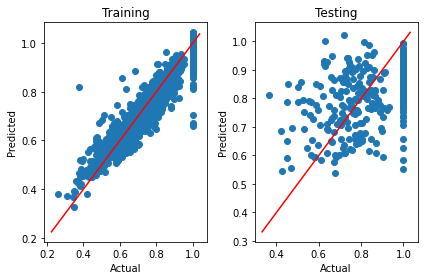

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 1
axes[0].scatter(x=y_train['neu'], y=y_pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['neu'], y=y_pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Testing")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 1
print('-----------------------------------------------------------------------------------------')
print('Train: R2 for Neutral sentiment:',r2_score(y_train['neu'],y_pred_train[:,i])) 
print('Train: rmse for Neutral sentiment:',np.sqrt(mean_squared_error(y_train['neu'],y_pred_train[:,i]))) 
print('Train: MAE for Neutral sentiment:',mean_absolute_error(y_train['neu'], y_pred_train[:,i]))
print('-----------------------------------------------------------------------------------------')
print('Test: R2 for Neutral sentiment:',r2_score(y_test['neu'],y_pred_test[:,i])) 
print('Test: rmse for Neutral sentiment:',np.sqrt(mean_squared_error(y_test['neu'],y_pred_test[:,i]))) 
print('Test: MAE for Neutral sentiment:',mean_absolute_error(y_test['neu'], y_pred_test[:,i]))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Train: R2 for Neutral sentiment: 0.8910482035265527
Train: rmse for Neutral sentiment: 0.054081552855679275
Train: MAE for Neutral sentiment: 0.042775549160148245
-----------------------------------------------------------------------------------------
Test: R2 for Neutral sentiment: 0.09340712916261873
Test: rmse for Neutral sentiment: 0.151889220877618
Test: MAE for Neutral sentiment: 0.12642779429902168
-----------------------------------------------------------------------------------------


#### **Positive Sentiment Evaluation**

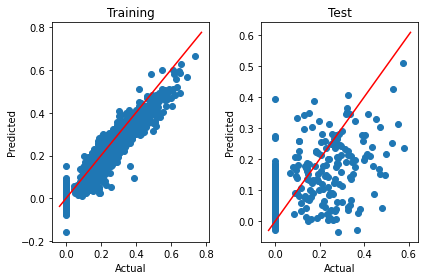

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 2
axes[0].scatter(x=y_train['pos'], y=y_pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['pos'], y=y_pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 2
print('-----------------------------------------------------------------------------------------')
print('Train: R2 for Positive sentiment:',r2_score(y_train['pos'],y_pred_train[:,i])) 
print('Train: rmse for Positive sentiment:',np.sqrt(mean_squared_error(y_train['pos'],y_pred_train[:,i]))) 
print('Train: MAE for Positive sentiment:',mean_absolute_error(y_train['pos'], y_pred_train[:,i]))
print('-----------------------------------------------------------------------------------------')
print('Test: R2 for Positive sentiment:',r2_score(y_test['pos'],y_pred_test[:,i])) 
print('Test: rmse for Positive sentiment:',np.sqrt(mean_squared_error(y_test['pos'],y_pred_test[:,i]))) 
print('Test: MAE for Positive sentiment:',mean_absolute_error(y_test['pos'], y_pred_test[:,i]))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Train: R2 for Positive sentiment: 0.9317955955487527
Train: rmse for Positive sentiment: 0.04081522335667235
Train: MAE for Positive sentiment: 0.0290334971417851
-----------------------------------------------------------------------------------------
Test: R2 for Positive sentiment: 0.2546024892442439
Test: rmse for Positive sentiment: 0.13140697661579354
Test: MAE for Positive sentiment: 0.0995748241894249
-----------------------------------------------------------------------------------------


#### **Compound Sentiment Evaluation**

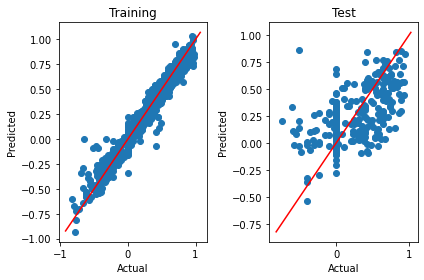

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 3
axes[0].scatter(x=y_train['com'], y=y_pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['com'], y=y_pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
# Evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 3
print('-----------------------------------------------------------------------------------------')
print('Train: R2 for Compound sentiment:',r2_score(y_train['com'],y_pred_train[:,i])) 
print('Train: rmse for Compound sentiment:',np.sqrt(mean_squared_error(y_train['com'],y_pred_train[:,i]))) 
print('Train: MAE for Compound sentiment:',mean_absolute_error(y_train['com'], y_pred_train[:,i]))
print('-----------------------------------------------------------------------------------------')
print('Test: R2 for Compound sentiment:',r2_score(y_test['com'],y_pred_test[:,i])) 
print('Test: rmse for Compound sentiment:',np.sqrt(mean_squared_error(y_test['com'],y_pred_test[:,i]))) 
print('Test: MAE for Compound sentiment:',mean_absolute_error(y_test['com'], y_pred_test[:,i]))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Train: R2 for Compound sentiment: 0.968087731800297
Train: rmse for Compound sentiment: 0.06101423367664282
Train: MAE for Compound sentiment: 0.04254206168918169
-----------------------------------------------------------------------------------------
Test: R2 for Compound sentiment: 0.3391491853945451
Test: rmse for Compound sentiment: 0.2889725594646556
Test: MAE for Compound sentiment: 0.2191694946821419
-----------------------------------------------------------------------------------------


## **Model 3 - Going deep!**

In this model, we attempted to try Deep Learning model with recurrent and convolution layers.

Following are key components of our model 3 architecture

1. **Embedding Layer**: Aiming to learn 120 dimensional vector.
2. Used 2 **Convolution layers**
3. **Bidirectional and LSTM** layers
4. **SimpleRNN**  layer

Coming to compile parameters 

1. **Optimizer:** Adam
2. **Loss function:** mean_squared_error




In [ ]:
# Input/Hyper parameters
maxlen = X.shape[1]  # Maximum length would length of our sequence for every tweet
max_words = 500  # Maximum number of words
embedding_dim = 120 # Dimension of  embedding layer that is learned

### **Model Architecture**

In [ ]:

model3 = Sequential() # initialize model

model3.add(Embedding(max_words, embedding_dim, input_length = maxlen)) # Embedding layer definition

# Convolution layers
model3.add(Conv1D(filters=32, kernel_size=2, input_shape=(X.shape[1],embedding_dim)))  # first convolution layer
model3.add(Dropout(0.1))
model3.add(MaxPooling1D(2)) # max pooling

model3.add(Conv1D(filters=64, kernel_size=2)) # second convolution layer
model3.add(Dropout(0.1))
model3.add(MaxPooling1D(2)) # max pooling

# LSTMs
model3.add(Bidirectional(LSTM(180, dropout=0.1,activation='linear',return_sequences=True)))
model3.add(LSTM(50, dropout=0.1,activation='linear',return_sequences=True))

# GRU
model3.add(GRU(20, activation='relu',return_sequences=True))

#RNN
model3.add(SimpleRNN(20, activation='relu'))


# DENSE layer
model3.add(Dense(4,activation='linear'))


model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 24, 120)           60000     
                                                                 
 conv1d (Conv1D)             (None, 23, 32)            7712      
                                                                 
 dropout_4 (Dropout)         (None, 23, 32)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 64)            4160      
                                                                 
 dropout_5 (Dropout)         (None, 10, 64)            0         
                                                      

### **Model Compile & Training**

**Epochs: 100**
Number of times the algorithm will work

**Batch size: 50**
Number of samples that will be propagated through our architecture

In [ ]:

# Compiling the model
model3.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


# Introducing early stopping to reduce overfitting (when loss function has stopped improving)
es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)



# model fit and storing all results in the history variable
history = model3.fit(X_train, y_train,
                    epochs=100,
                    batch_size=50,
                    validation_data=(X_val, y_val),callbacks=[es],shuffle=True)

Epoch 1/100
49/49 [==============================] - 12s 95ms/step - loss: 0.1063 - mae: 0.2422 - val_loss: 0.0438 - val_mae: 0.1505
Epoch 2/100
49/49 [==============================] - 3s 70ms/step - loss: 0.0325 - mae: 0.1281 - val_loss: 0.0293 - val_mae: 0.1208
Epoch 3/100
49/49 [==============================] - 4s 74ms/step - loss: 0.0231 - mae: 0.1052 - val_loss: 0.0268 - val_mae: 0.1141
Epoch 4/100
49/49 [==============================] - 4s 77ms/step - loss: 0.0179 - mae: 0.0905 - val_loss: 0.0275 - val_mae: 0.1079
Epoch 5/100
49/49 [==============================] - 4s 74ms/step - loss: 0.0170 - mae: 0.0886 - val_loss: 0.0256 - val_mae: 0.1063
Epoch 6/100
49/49 [==============================] - 4s 76ms/step - loss: 0.0156 - mae: 0.0839 - val_loss: 0.0302 - val_mae: 0.1226
Epoch 7/100
49/49 [==============================] - 4s 75ms/step - loss: 0.0148 - mae: 0.0831 - val_loss: 0.0265 - val_mae: 0.1099
Epoch 8/100
49/49 [==============================] - 4s 78ms/step - loss: 0

### **Loss functions**

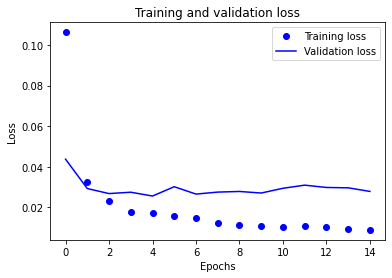

In [ ]:
import matplotlib.pyplot as plt

# extracting loss values for train and validation
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting loss values for all epochs
epochs = range(len(loss))


# plots
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

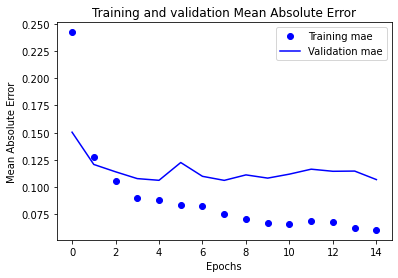

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['mae']
val_loss = history.history['val_mae']

epochs = range(len(loss))



plt.plot(epochs, loss, 'bo', label='Training mae')
plt.plot(epochs, val_loss, 'b', label='Validation mae')
plt.title('Training and validation Mean Absolute Error')

plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')

plt.legend()

plt.show()

### **Computing predictions**

In [ ]:
y_pred_train=model3.predict(X_train)
y_pred_test = model3.predict(X_test)

11/11 [==============================] - 0s 16ms/step


### **Sentiment level Metric Analysis**



#### **Negative evaluation**

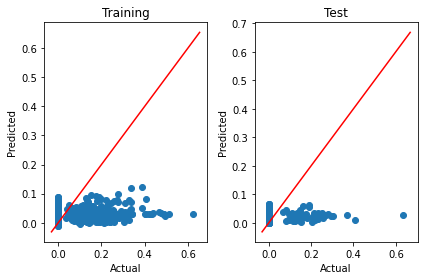

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 0
axes[0].scatter(x=y_train['neg'], y=y_pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['neg'], y=y_pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 0
print('-----------------------------------------------------------------------------------------')
print('Train: R2 for negative sentiment:',r2_score(y_train['neg'],y_pred_train[:,i])) 
print('Train: rmse for negative sentiment:',np.sqrt(mean_squared_error(y_train['neg'],y_pred_train[:,i]))) 
print('Train: MAE for negative sentiment:',mean_absolute_error(y_train['neg'], y_pred_train[:,i]))
print('-----------------------------------------------------------------------------------------')
print('Test: R2 for negative sentiment:',r2_score(y_test['neg'],y_pred_test[:,i])) 
print('Test: rmse for negative sentiment:',np.sqrt(mean_squared_error(y_test['neg'],y_pred_test[:,i]))) 
print('Test: MAE for negative sentiment:',mean_absolute_error(y_test['neg'], y_pred_test[:,i]))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Train: R2 for negative sentiment: 0.01325021255058667
Train: rmse for negative sentiment: 0.06828334991603983
Train: MAE for negative sentiment: 0.03992115178848867
-----------------------------------------------------------------------------------------
Test: R2 for negative sentiment: -0.0377843941232332
Test: rmse for negative sentiment: 0.08192177197543195
Test: MAE for negative sentiment: 0.04693718959637149
-----------------------------------------------------------------------------------------


#### **Neutral Evaluation**

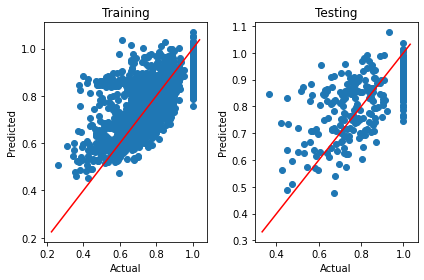

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 1
axes[0].scatter(x=y_train['neu'], y=y_pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['neu'], y=y_pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Testing")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 1
print('-----------------------------------------------------------------------------------------')
print('Train: R2 for neutral sentiment:',r2_score(y_train['neu'],y_pred_train[:,i])) 
print('Train: rmse for neutral sentiment:',np.sqrt(mean_squared_error(y_train['neu'],y_pred_train[:,i]))) 
print('Train: MAE for neutral sentiment:',mean_absolute_error(y_train['neu'], y_pred_train[:,i]))
print('-----------------------------------------------------------------------------------------')
print('Test: R2 for neutral sentiment:',r2_score(y_test['neu'],y_pred_test[:,i])) 
print('Test: rmse for neutral sentiment:',np.sqrt(mean_squared_error(y_test['neu'],y_pred_test[:,i]))) 
print('Test: MAE for neutral sentiment:',mean_absolute_error(y_test['neu'], y_pred_test[:,i]))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Train: R2 for neutral sentiment: 0.5538922744161694
Train: rmse for neutral sentiment: 0.10943388755288425
Train: MAE for neutral sentiment: 0.0892261845149978
-----------------------------------------------------------------------------------------
Test: R2 for neutral sentiment: 0.3328645855599176
Test: rmse for neutral sentiment: 0.13029501563735324
Test: MAE for neutral sentiment: 0.11002789134994102
-----------------------------------------------------------------------------------------


#### **Positive evaluation**

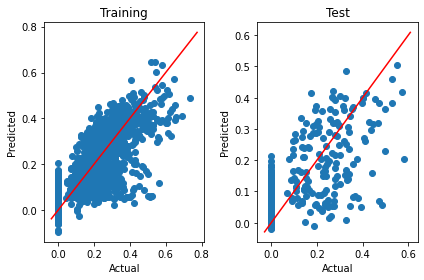

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 2
axes[0].scatter(x=y_train['pos'], y=y_pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['pos'], y=y_pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 2
print('-----------------------------------------------------------------------------------------')
print('Train: R2 for posititve sentiment:',r2_score(y_train['pos'],y_pred_train[:,i])) 
print('Train: rmse for positive sentiment:',np.sqrt(mean_squared_error(y_train['pos'],y_pred_train[:,i]))) 
print('Train: MAE for positive sentiment:',mean_absolute_error(y_train['pos'], y_pred_train[:,i]))
print('-----------------------------------------------------------------------------------------')
print('Test: R2 for positive sentiment:',r2_score(y_test['pos'],y_pred_test[:,i])) 
print('Test: rmse for positive sentiment:',np.sqrt(mean_squared_error(y_test['pos'],y_pred_test[:,i]))) 
print('Test: MAE for positive sentiment:',mean_absolute_error(y_test['pos'], y_pred_test[:,i]))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Train: R2 for posititve sentiment: 0.6885211506898903
Train: rmse for positive sentiment: 0.08722284490356133
Train: MAE for positive sentiment: 0.06742567594526883
-----------------------------------------------------------------------------------------
Test: R2 for positive sentiment: 0.42806999387249567
Test: rmse for positive sentiment: 0.11510545219863298
Test: MAE for positive sentiment: 0.09114094737624731
-----------------------------------------------------------------------------------------


#### **Compound Evaluation**

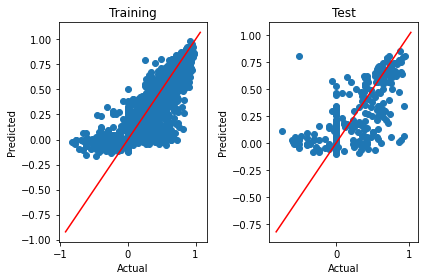

In [ ]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
i = 3
axes[0].scatter(x=y_train['com'], y=y_pred_train[:,i]) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test['com'], y=y_pred_test[:,i]) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
i = 3
print('-----------------------------------------------------------------------------------------')
print('Train: R2 for compound sentiment:',r2_score(y_train['com'],y_pred_train[:,i])) 
print('Train: rmse for compound sentiment:',np.sqrt(mean_squared_error(y_train['com'],y_pred_train[:,i]))) 
print('Train: MAE for compound sentiment:',mean_absolute_error(y_train['com'], y_pred_train[:,i]))
print('-----------------------------------------------------------------------------------------')
print('Test: R2 for compound sentiment:',r2_score(y_test['com'],y_pred_test[:,i])) 
print('Test: rmse for compound sentiment:',np.sqrt(mean_squared_error(y_test['com'],y_pred_test[:,i]))) 
print('Test: MAE for compound sentiment:',mean_absolute_error(y_test['com'], y_pred_test[:,i]))
print('-----------------------------------------------------------------------------------------')

-----------------------------------------------------------------------------------------
Train: R2 for compound sentiment: 0.750036772575127
Train: rmse for compound sentiment: 0.17076166712722876
Train: MAE for compound sentiment: 0.11452863281591144
-----------------------------------------------------------------------------------------
Test: R2 for compound sentiment: 0.4658374353497803
Test: rmse for compound sentiment: 0.2598014759002288
Test: MAE for compound sentiment: 0.1801471497152082
-----------------------------------------------------------------------------------------


## **Results Summary**

**Model I**

* R2 

  Neg - 0.32 , Pos - 0.71 , Neu - 0.64 , Com - 0.70
* RMSE

 Neg - 0.05  , Pos - 0.75 , Neu - 0.10 , Com - 0.19

* MAE
 
 Neg - 0.02  , Pos - 0.06, Neu - 0.08, Com - 0.14



**Model II**

* R2 

  Neg - 0.01 , Pos - 0.25 , Neu - 0.09 , Com - 0.34
* RMSE

 Neg - 0.08  , Pos - 0.15 , Neu - 0.15 , Com - 0.29

* MAE
 
 Neg - 0.04  , Pos - 0.12, Neu - 0.12, Com - 0.21



**Model III**

* R2 

  Neg - 0.02 , Pos - 0.52 , Neu - 0.47 , Com - 0.54
* RMSE

 Neg - 0.08  , Pos - 0.12 , Neu - 0.13 , Com - 0.26

* MAE
 
 Neg - 0.05  , Pos - 0.08, Neu - 0.11, Com - 0.18



## **Analysis**

Write five to ten bullets to compare your results and discuss how you improve the models by changing the architectures. Was your Deep Learning model able to 'steal' the logic of the nltk SentimentIntensityAnalyzer()? Make some comments about how deep learning is superior to rules-based systems like the nltk SentimentIntensityAnalyzer().



* We tried different twitter handles to finally come into this conclusion, we observed there is some inconsistency in the tweets that were scraped. For some of the handles there were not enough tweets. For others there were tweets in other languages written in english. 

* Language inconsistencies created problem when we performed modeling (especially model 2) where we used glove word embeddings (that are extracted from english wikipedia)

* Initially we started running with 1000 tweets for Samsung, Iphone each, but we saw an improvement in results when we increase the number of tweets to 2000 for each.




*   Initially in model 1, we used ecodings of tf-idf for the entire dataset and proceeded with train, test split, however we realised that this is causing data leakage leading to incorrect results. 
* We changed the approach by performing lemmatization first and then perform train test split. We used TfidfVectorizer() to fit transform on train set and then transform on validation and test set. 
* By doing these changed R2 is improved by ~25% (0.09 to 0.32)


* In model 2, Intial models are constructed with only two layers which did not yield good results so, we changed the architecture by adding two more layers and increasing the numnber of nodes then the model r-squared increased.
*   Glove embeddings are used in the model. These are set to be un-trainable. We could try training these embeddings from glove to obtain better results.* Overall, model-2 was not able to steal the logic of NLTK package.

* In model3, We tried several models by building components over simple RNN like 1D CNN, Bidirectional LSTM. With increase in complexity we observed the model is not able to generalize well on training data due to insufficient data. We tried and observed improvement in results by increasing dataset size to 3K, 4K. However due to exponential increase in run time we have stopped at 2K.

* In model3, for negative sentiment we see a distorted Actual vs Predicted plot. When we observed the distribution of negative we can see 95% of samples are concentrated at 0. Hence our monster model is finding difficulty in predicting higher values of negative sentiments.

* SentimentIntensityAnalyzer is a predefined model limiting the scope to fine tune it. Deep learning on the other hand has different models to explore such as RNN, Dense, LSM, GRU etc. Model weights can be tuned by introducing these layers to the model.

* Out of three models, our model I is able to stole the concepts of SentimentIntensity analyzer 







